## 0. 라이브러리 설정

In [1]:
from tqdm import tqdm
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.options.display.float_format="{:.5f}".format
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 불러오기

In [2]:
data = pd.read_csv('data/prf_dataset.csv')

In [3]:
data.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,전체좌석,일반예매율,멤버십합계,가중예매율,멤버십유입률
0,2018-11-25,1700,1,20181029.00000,클래식,15,김대진 피아노 독주회,0,1시간 50분,3,50000.00000,20000.00000,6,1818,1537,2505.00000,0.61357,258,0.00412,0.00671


## 2. 데이터 전처리

In [4]:
def make_month(data):
    # 데이터프레임에서 '공연일자' 열을 datetime 형식으로 변환
    result = data.copy()
    result['공연일자'] = pd.to_datetime(result['공연일자'])

    # '월' 열 생성
    result['월'] = result['공연일자'].dt.month
    
    return result

In [5]:
# '러닝타임' column에서 시간과 분을 추출하여 분 단위로 변환
def convert_to_minutes(time_str):
    # '시간'과 '분'을 기준으로 문자열을 분리
    parts = time_str.split()
    
    total_minutes = 0  # 총 분 초기화
    
    for part in parts:
        if '시간' in part:
            # '시간'을 포함한 부분에서 숫자를 추출하여 분 단위로 변환
            hours = int(part.replace('시간', '')) * 60
            total_minutes += hours
        elif '분' in part:
            # '분'을 포함한 부분에서 숫자를 추출하여 분 단위로 변환
            minutes = int(part.replace('분', ''))
            total_minutes += minutes
    
    return total_minutes

# '러닝타임' column을 분 단위로 변환하여 새로운 column에 저장
data['러닝타임'] = data['러닝타임'].apply(convert_to_minutes)

In [6]:
data = data.fillna(0)
data['가격종류'] = data['가격종류'].replace(0, 1)
data['요일'] = data['요일'].replace(0, '월요일')
data['요일'] = data['요일'].replace(1, '화요일')
data['요일'] = data['요일'].replace(2, '수요일')
data['요일'] = data['요일'].replace(3, '목요일')
data['요일'] = data['요일'].replace(4, '금요일')
data['요일'] = data['요일'].replace(5, '토요일')
data['요일'] = data['요일'].replace(6, '일요일')

In [7]:
data = make_month(data)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   공연일자    516 non-null    datetime64[ns]
 1   공연시작시간  516 non-null    int64         
 2   선예매여부   516 non-null    int64         
 3   예매시작일   516 non-null    float64       
 4   장르      516 non-null    object        
 5   휴게시간    516 non-null    int64         
 6   공연명     516 non-null    object        
 7   내한여부    516 non-null    int64         
 8   러닝타임    516 non-null    int64         
 9   가격종류    516 non-null    int64         
 10  R석      516 non-null    float64       
 11  A석      516 non-null    float64       
 12  요일      516 non-null    object        
 13  결제내역수   516 non-null    int64         
 14  티켓판매량   516 non-null    int64         
 15  전체좌석    516 non-null    float64       
 16  일반예매율   516 non-null    float64       
 17  멤버십합계   516 non-null    int64         
 18  가중예매율   51

In [9]:
data.head(1)

,공연일자,공연시작시간,선예매여부,예매시작일,장르,휴게시간,공연명,내한여부,러닝타임,가격종류,R석,A석,요일,결제내역수,티켓판매량,전체좌석,일반예매율,멤버십합계,가중예매율,멤버십유입률,월
0,2018-11-25,1700,1,20181029.00000,클래식,15,김대진 피아노 독주회,0,110,3,50000.00000,20000.00000,일요일,1818,1537,2505.00000,0.61357,258,0.00412,0.00671,11


In [10]:
data_temp = data[['공연시작시간', '선예매여부', '장르', '내한여부', '러닝타임', '요일', '일반예매율', '멤버십유입률','월']]

In [11]:
data_temp = pd.get_dummies(data_temp, columns=['장르', '요일', '월'])

In [12]:
data_temp.head(1)

,공연시작시간,선예매여부,내한여부,러닝타임,일반예매율,멤버십유입률,장르_교향곡,장르_기타,장르_독주,장르_복합장르,장르_성악,장르_실내악,장르_오페라,장르_재즈,장르_콘서트,장르_크로스오버,장르_클래식,장르_합창,요일_금요일,요일_목요일,요일_수요일,요일_일요일,요일_토요일,요일_화요일,월_1,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12
0,1700,1,0,110,0.61357,0.00671,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 3. train test split

In [13]:
X = data_temp.drop(['일반예매율', '멤버십유입률'], axis=1)
y = data_temp[['일반예매율', '멤버십유입률']]

In [14]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
train_X

,공연시작시간,선예매여부,내한여부,러닝타임,장르_교향곡,장르_기타,장르_독주,장르_복합장르,장르_성악,장르_실내악,장르_오페라,장르_재즈,장르_콘서트,장르_크로스오버,장르_클래식,장르_합창,요일_금요일,요일_목요일,요일_수요일,요일_일요일,요일_토요일,요일_화요일,월_1,월_2,월_3,월_4,월_5,월_6,월_7,월_8,월_9,월_10,월_11,월_12
329,1930,1,1,110,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
173,1930,1,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
272,1930,1,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
496,1930,1,0,120,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
182,1930,1,0,90,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,2000,1,0,120,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
106,2000,1,0,90,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
270,1930,1,0,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
435,1700,0,1,100,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
# one-hot encoding 값들만 남기기
train_X_new = train_X.drop(['공연시작시간','러닝타임'], axis=1)
test_X_new = test_X.drop(['공연시작시간','러닝타임'], axis=1)

In [17]:
# scaling이 필요한 값들
train_X_new_cont = train_X[['공연시작시간','러닝타임']]
test_X_new_cont = test_X[['공연시작시간','러닝타임']]

In [18]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = StandardScaler()

train_X_new_cont_rbs = scaler.fit_transform(train_X_new_cont)
train_X_new_cont_rbs = pd.DataFrame(train_X_new_cont_rbs, columns=train_X_new_cont.columns)

test_X_new_cont_rbs = scaler.transform(test_X_new_cont)
test_X_new_cont_rbs = pd.DataFrame(test_X_new_cont_rbs, columns=test_X_new_cont.columns)

In [19]:
train_X_new_cont_rbs.reset_index(drop=True, inplace=True)
train_X_new.reset_index(drop=True, inplace=True)
test_X_new_cont_rbs.reset_index(drop=True, inplace=True)
test_X_new.reset_index(drop=True, inplace=True)
train_y.reset_index(drop=True, inplace=True)
test_y.reset_index(drop=True, inplace=True)

In [20]:
train_X = pd.concat([train_X_new_cont_rbs, train_X_new], axis=1)
test_X = pd.concat([test_X_new_cont_rbs, test_X_new], axis=1)

In [21]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((412, 34), (104, 34), (412, 2), (104, 2))

In [22]:
train_y_res = train_y['일반예매율']
train_y_mem = train_y['멤버십유입률']

test_y_res = test_y['일반예매율']
test_y_mem = test_y['멤버십유입률']

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error

## 4. 일반예매율 예측

### DecisionTree

In [24]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(train_X, train_y_res)

print(f"MSE for DecisionTree : {mean_squared_error(test_y_res, dt.predict(test_X))}")
print(f"MSLE for DecisionTree : {mean_squared_log_error(test_y_res, dt.predict(test_X))}")

MSE for DecisionTree : 0.13506260732151457
MSLE for DecisionTree : 0.060291588525285794


#### DecisionTree Tuning

In [25]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
dt = DecisionTreeRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(train_X, train_y_res)

# Get the best parameters from the grid search
best_params = grid_search_dt.best_params_
print("Best hyperparameters for DecisionTree: ", grid_search_dt.best_params_)

Best hyperparameters for DecisionTree:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [26]:
dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=2, random_state=42)
dt.fit(train_X, train_y_res)

print(f"MSE for DecisionTree : {mean_squared_error(test_y_res, dt.predict(test_X))}")
print(f"MSLE for DecisionTree : {mean_squared_log_error(test_y_res, dt.predict(test_X))}")

MSE for DecisionTree : 0.09449348754207222
MSLE for DecisionTree : 0.04134503183927179


### RandomForest

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(train_X, train_y_res)

print(f"MSE for RandomForest : {mean_squared_error(test_y_res, rf.predict(test_X))}")
print(f"MSLE for RandomForest : {mean_squared_log_error(test_y_res, rf.predict(test_X))}")

MSE for RandomForest : 0.08795977601078081
MSLE for RandomForest : 0.03889196415364897


#### RandomForest Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(train_X, train_y_res)

# Get the best parameters from the grid search
best_params = grid_search_rf.best_params_
print("Best hyperparameters for RandomForest: ", grid_search_rf.best_params_)

Best hyperparameters for RandomForest:  {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [29]:
rf = RandomForestRegressor(max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=100, random_state=42)
rf.fit(train_X, train_y_res)

print(f"MSE for RandomForest : {mean_squared_error(test_y_res, rf.predict(test_X))}")
print(f"MSLE for RandomForest : {mean_squared_log_error(test_y_res, rf.predict(test_X))}")

MSE for RandomForest : 0.07299586076446399
MSLE for RandomForest : 0.03218337780690633


### LightGBM

In [30]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(random_state=42)
lgbm.fit(train_X, train_y_res)

print(f"MSE for LightGBM : {mean_squared_error(test_y_res, lgbm.predict(test_X))}")
print(f"MSLE for LightGBM : {mean_squared_log_error(test_y_res, lgbm.predict(test_X))}")

MSE for LightGBM : 0.09106745865481675
MSLE for LightGBM : 0.040712677317851664


#### LightGBM Tuning

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the model
lgbm = LGBMRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search_lgbm.fit(train_X, train_y_res)

# Print the best hyperparameters
print("Best hyperparameters for LightGBM: ", grid_search_lgbm.best_params_)

Best hyperparameters for LightGBM:  {'learning_rate': 0.001, 'n_estimators': 500, 'num_leaves': 10}


In [32]:
lgbm = LGBMRegressor(learning_rate=0.001, n_estimators=500, num_leaves=10, random_state=42)
lgbm.fit(train_X, train_y_res)

print(f"MSE for LightGBM : {mean_squared_error(test_y_res, lgbm.predict(test_X))}")
print(f"MSLE for LightGBM : {mean_squared_log_error(test_y_res, lgbm.predict(test_X))}")

MSE for LightGBM : 0.0716714294514548
MSLE for LightGBM : 0.031691640492345304


### XGBoost

In [33]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(train_X, train_y_res)

print(f"MSE for XGBoost : {mean_squared_error(test_y_res, xgb.predict(test_X))}")
#print(f"MSLE for XGBoost : {mean_squared_log_error(test_y_res, xgb.predict(test_X))}")

MSE for XGBoost : 0.10786897513737098


#### XGBoost Tuning

In [34]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Define the GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV with the data
grid_search_xgb.fit(train_X, train_y_res)

# Get the best hyperparameters and print the best score
best_params = grid_search_xgb.best_params_
print("Best hyperparameters for XGBoost: ", best_params)

Best hyperparameters for XGBoost:  {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 200}


In [35]:
xgb = XGBRegressor(learning_rate=0.001, max_depth=7, n_estimators=200, random_state=42)
xgb.fit(train_X, train_y_res)

print(f"MSE for XGBoost : {mean_squared_error(test_y_res, xgb.predict(test_X))}")
print(f"MSLE for XGBoost : {mean_squared_log_error(test_y_res, xgb.predict(test_X))}")

MSE for XGBoost : 0.07264369024271909
MSLE for XGBoost : 0.03227198814025719


### CatBoost

In [36]:
from catboost import CatBoostRegressor

cb = CatBoostRegressor(random_state=42)
cb.fit(train_X, train_y_res)

print(f"MSE for CatBoost : {mean_squared_error(test_y_res, cb.predict(test_X))}")
print(f"MSLE for CatBoost : {mean_squared_log_error(test_y_res, cb.predict(test_X))}")

Learning rate set to 0.03559
0:	learn: 0.2532649	total: 140ms	remaining: 2m 20s
1:	learn: 0.2528476	total: 141ms	remaining: 1m 10s
2:	learn: 0.2523097	total: 142ms	remaining: 47s
3:	learn: 0.2515784	total: 142ms	remaining: 35.4s
4:	learn: 0.2513113	total: 143ms	remaining: 28.4s
5:	learn: 0.2508489	total: 143ms	remaining: 23.8s
6:	learn: 0.2505178	total: 144ms	remaining: 20.4s
7:	learn: 0.2499869	total: 145ms	remaining: 17.9s
8:	learn: 0.2491750	total: 145ms	remaining: 16s
9:	learn: 0.2487599	total: 146ms	remaining: 14.4s
10:	learn: 0.2483251	total: 146ms	remaining: 13.2s
11:	learn: 0.2478030	total: 147ms	remaining: 12.1s
12:	learn: 0.2474454	total: 148ms	remaining: 11.2s
13:	learn: 0.2471926	total: 149ms	remaining: 10.5s
14:	learn: 0.2468371	total: 150ms	remaining: 9.83s
15:	learn: 0.2462853	total: 151ms	remaining: 9.26s
16:	learn: 0.2457352	total: 152ms	remaining: 8.77s
17:	learn: 0.2453724	total: 153ms	remaining: 8.34s
18:	learn: 0.2449049	total: 154ms	remaining: 7.97s
19:	learn: 0.2

305:	learn: 0.1809515	total: 471ms	remaining: 1.07s
306:	learn: 0.1807668	total: 473ms	remaining: 1.07s
307:	learn: 0.1807244	total: 474ms	remaining: 1.06s
308:	learn: 0.1805325	total: 475ms	remaining: 1.06s
309:	learn: 0.1805120	total: 476ms	remaining: 1.06s
310:	learn: 0.1804439	total: 477ms	remaining: 1.06s
311:	learn: 0.1803323	total: 478ms	remaining: 1.05s
312:	learn: 0.1799187	total: 479ms	remaining: 1.05s
313:	learn: 0.1795916	total: 480ms	remaining: 1.05s
314:	learn: 0.1793103	total: 481ms	remaining: 1.05s
315:	learn: 0.1790184	total: 482ms	remaining: 1.04s
316:	learn: 0.1788988	total: 483ms	remaining: 1.04s
317:	learn: 0.1786701	total: 484ms	remaining: 1.04s
318:	learn: 0.1786412	total: 485ms	remaining: 1.03s
319:	learn: 0.1783966	total: 486ms	remaining: 1.03s
320:	learn: 0.1783686	total: 487ms	remaining: 1.03s
321:	learn: 0.1783363	total: 488ms	remaining: 1.03s
322:	learn: 0.1781399	total: 489ms	remaining: 1.02s
323:	learn: 0.1780439	total: 490ms	remaining: 1.02s
324:	learn: 

605:	learn: 0.1489780	total: 773ms	remaining: 503ms
606:	learn: 0.1489001	total: 774ms	remaining: 501ms
607:	learn: 0.1488788	total: 775ms	remaining: 500ms
608:	learn: 0.1488752	total: 776ms	remaining: 498ms
609:	learn: 0.1486996	total: 777ms	remaining: 497ms
610:	learn: 0.1485626	total: 778ms	remaining: 495ms
611:	learn: 0.1485587	total: 779ms	remaining: 494ms
612:	learn: 0.1485442	total: 780ms	remaining: 492ms
613:	learn: 0.1484357	total: 781ms	remaining: 491ms
614:	learn: 0.1484066	total: 782ms	remaining: 489ms
615:	learn: 0.1483807	total: 782ms	remaining: 488ms
616:	learn: 0.1482231	total: 783ms	remaining: 486ms
617:	learn: 0.1481213	total: 784ms	remaining: 485ms
618:	learn: 0.1479290	total: 785ms	remaining: 483ms
619:	learn: 0.1478932	total: 786ms	remaining: 482ms
620:	learn: 0.1477638	total: 787ms	remaining: 481ms
621:	learn: 0.1477274	total: 788ms	remaining: 479ms
622:	learn: 0.1477135	total: 789ms	remaining: 477ms
623:	learn: 0.1476590	total: 790ms	remaining: 476ms
624:	learn: 

899:	learn: 0.1276314	total: 1.07s	remaining: 119ms
900:	learn: 0.1275892	total: 1.08s	remaining: 118ms
901:	learn: 0.1275662	total: 1.08s	remaining: 117ms
902:	learn: 0.1274961	total: 1.08s	remaining: 116ms
903:	learn: 0.1274290	total: 1.08s	remaining: 115ms
904:	learn: 0.1273704	total: 1.08s	remaining: 113ms
905:	learn: 0.1273180	total: 1.08s	remaining: 112ms
906:	learn: 0.1273112	total: 1.08s	remaining: 111ms
907:	learn: 0.1272426	total: 1.08s	remaining: 110ms
908:	learn: 0.1272326	total: 1.08s	remaining: 109ms
909:	learn: 0.1271204	total: 1.08s	remaining: 107ms
910:	learn: 0.1271178	total: 1.08s	remaining: 106ms
911:	learn: 0.1270933	total: 1.09s	remaining: 105ms
912:	learn: 0.1270303	total: 1.09s	remaining: 104ms
913:	learn: 0.1269918	total: 1.09s	remaining: 102ms
914:	learn: 0.1269745	total: 1.09s	remaining: 101ms
915:	learn: 0.1269586	total: 1.09s	remaining: 100ms
916:	learn: 0.1268656	total: 1.09s	remaining: 98.9ms
917:	learn: 0.1268425	total: 1.09s	remaining: 97.6ms
918:	learn

#### CatBoost Tuning

In [37]:
from sklearn.model_selection import GridSearchCV

# Define the CatBoost Regressor model
cb = CatBoostRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'depth': [3, 5, 7, 10, 20],
    'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]
}

# Define the grid search using the model and hyperparameters
grid_search_cb = GridSearchCV(cb, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cb.fit(train_X, train_y_res)

# Print the best parameters and the best score
print("Best parameters for CatBoost:", grid_search_cb.best_params_)

0:	learn: 0.2535106	total: 14.6ms	remaining: 14.6s
1:	learn: 0.2534917	total: 24.6ms	remaining: 12.3s
2:	learn: 0.2534704	total: 27.5ms	remaining: 9.13s
3:	learn: 0.2534516	total: 39.8ms	remaining: 9.92s
4:	learn: 0.2534387	total: 45ms	remaining: 8.96s
5:	learn: 0.2534298	total: 47.5ms	remaining: 7.87s
6:	learn: 0.2534149	total: 50.7ms	remaining: 7.2s
7:	learn: 0.2534010	total: 53ms	remaining: 6.58s
8:	learn: 0.2533830	total: 55.7ms	remaining: 6.13s
9:	learn: 0.2533535	total: 65.8ms	remaining: 6.51s
10:	learn: 0.2533421	total: 70.3ms	remaining: 6.32s
11:	learn: 0.2533206	total: 73.7ms	remaining: 6.07s
12:	learn: 0.2533063	total: 86.8ms	remaining: 6.59s
13:	learn: 0.2532711	total: 92ms	remaining: 6.48s
14:	learn: 0.2532439	total: 95.4ms	remaining: 6.26s
15:	learn: 0.2532184	total: 98.7ms	remaining: 6.07s
16:	learn: 0.2532031	total: 102ms	remaining: 5.93s
17:	learn: 0.2531902	total: 104ms	remaining: 5.7s
18:	learn: 0.2531736	total: 110ms	remaining: 5.69s
19:	learn: 0.2531603	total: 116ms

173:	learn: 0.2504493	total: 925ms	remaining: 4.39s
174:	learn: 0.2504317	total: 927ms	remaining: 4.37s
175:	learn: 0.2504189	total: 929ms	remaining: 4.35s
176:	learn: 0.2504016	total: 931ms	remaining: 4.33s
177:	learn: 0.2503876	total: 933ms	remaining: 4.31s
178:	learn: 0.2503683	total: 936ms	remaining: 4.29s
179:	learn: 0.2503513	total: 938ms	remaining: 4.27s
180:	learn: 0.2503406	total: 939ms	remaining: 4.25s
181:	learn: 0.2503177	total: 942ms	remaining: 4.23s
182:	learn: 0.2502986	total: 944ms	remaining: 4.21s
183:	learn: 0.2502786	total: 951ms	remaining: 4.22s
184:	learn: 0.2502548	total: 953ms	remaining: 4.2s
185:	learn: 0.2502225	total: 955ms	remaining: 4.18s
186:	learn: 0.2502125	total: 957ms	remaining: 4.16s
187:	learn: 0.2501970	total: 959ms	remaining: 4.14s
188:	learn: 0.2501819	total: 961ms	remaining: 4.13s
189:	learn: 0.2501702	total: 964ms	remaining: 4.11s
190:	learn: 0.2501557	total: 966ms	remaining: 4.09s
191:	learn: 0.2501374	total: 969ms	remaining: 4.08s
192:	learn: 0

392:	learn: 0.2467940	total: 1.39s	remaining: 2.14s
393:	learn: 0.2467882	total: 1.39s	remaining: 2.13s
394:	learn: 0.2467694	total: 1.39s	remaining: 2.13s
395:	learn: 0.2467430	total: 1.39s	remaining: 2.12s
396:	learn: 0.2467300	total: 1.39s	remaining: 2.11s
397:	learn: 0.2467142	total: 1.39s	remaining: 2.11s
398:	learn: 0.2466997	total: 1.4s	remaining: 2.1s
399:	learn: 0.2466811	total: 1.4s	remaining: 2.1s
400:	learn: 0.2466609	total: 1.4s	remaining: 2.09s
401:	learn: 0.2466441	total: 1.4s	remaining: 2.08s
402:	learn: 0.2466232	total: 1.4s	remaining: 2.08s
403:	learn: 0.2466076	total: 1.4s	remaining: 2.07s
404:	learn: 0.2465969	total: 1.4s	remaining: 2.06s
405:	learn: 0.2465706	total: 1.41s	remaining: 2.06s
406:	learn: 0.2465553	total: 1.41s	remaining: 2.05s
407:	learn: 0.2465402	total: 1.41s	remaining: 2.04s
408:	learn: 0.2465286	total: 1.41s	remaining: 2.04s
409:	learn: 0.2465135	total: 1.41s	remaining: 2.03s
410:	learn: 0.2464960	total: 1.41s	remaining: 2.02s
411:	learn: 0.2464784

637:	learn: 0.2429299	total: 1.7s	remaining: 963ms
638:	learn: 0.2429175	total: 1.7s	remaining: 959ms
639:	learn: 0.2429056	total: 1.7s	remaining: 956ms
640:	learn: 0.2428885	total: 1.7s	remaining: 953ms
641:	learn: 0.2428699	total: 1.7s	remaining: 949ms
642:	learn: 0.2428592	total: 1.7s	remaining: 946ms
643:	learn: 0.2428493	total: 1.7s	remaining: 942ms
644:	learn: 0.2428296	total: 1.71s	remaining: 939ms
645:	learn: 0.2428156	total: 1.71s	remaining: 936ms
646:	learn: 0.2428029	total: 1.71s	remaining: 932ms
647:	learn: 0.2427786	total: 1.71s	remaining: 929ms
648:	learn: 0.2427678	total: 1.71s	remaining: 926ms
649:	learn: 0.2427561	total: 1.71s	remaining: 923ms
650:	learn: 0.2427456	total: 1.71s	remaining: 919ms
651:	learn: 0.2427257	total: 1.72s	remaining: 916ms
652:	learn: 0.2427099	total: 1.72s	remaining: 913ms
653:	learn: 0.2426879	total: 1.72s	remaining: 909ms
654:	learn: 0.2426714	total: 1.72s	remaining: 906ms
655:	learn: 0.2426611	total: 1.72s	remaining: 902ms
656:	learn: 0.24264

875:	learn: 0.2395958	total: 2.01s	remaining: 284ms
876:	learn: 0.2395652	total: 2.01s	remaining: 282ms
877:	learn: 0.2395560	total: 2.01s	remaining: 279ms
878:	learn: 0.2395454	total: 2.01s	remaining: 277ms
879:	learn: 0.2395380	total: 2.01s	remaining: 274ms
880:	learn: 0.2395150	total: 2.01s	remaining: 272ms
881:	learn: 0.2395026	total: 2.01s	remaining: 270ms
882:	learn: 0.2394963	total: 2.02s	remaining: 267ms
883:	learn: 0.2394856	total: 2.02s	remaining: 265ms
884:	learn: 0.2394711	total: 2.02s	remaining: 262ms
885:	learn: 0.2394572	total: 2.02s	remaining: 260ms
886:	learn: 0.2394345	total: 2.02s	remaining: 257ms
887:	learn: 0.2394185	total: 2.02s	remaining: 255ms
888:	learn: 0.2394079	total: 2.02s	remaining: 253ms
889:	learn: 0.2393857	total: 2.02s	remaining: 250ms
890:	learn: 0.2393706	total: 2.02s	remaining: 248ms
891:	learn: 0.2393610	total: 2.03s	remaining: 245ms
892:	learn: 0.2393539	total: 2.03s	remaining: 243ms
893:	learn: 0.2393330	total: 2.03s	remaining: 241ms
894:	learn: 

In [38]:
cb = CatBoostRegressor(depth=7, learning_rate=0.001, random_state=42)
cb.fit(train_X, train_y_res)

print(f"MSE for CatBoost : {mean_squared_error(test_y_res, cb.predict(test_X))}")
print(f"MSLE for CatBoost : {mean_squared_log_error(test_y_res, cb.predict(test_X))}")

0:	learn: 0.2535106	total: 753us	remaining: 753ms
1:	learn: 0.2534917	total: 2.78ms	remaining: 1.39s
2:	learn: 0.2534704	total: 4.52ms	remaining: 1.5s
3:	learn: 0.2534516	total: 6.02ms	remaining: 1.5s
4:	learn: 0.2534387	total: 7.4ms	remaining: 1.47s
5:	learn: 0.2534298	total: 8.43ms	remaining: 1.4s
6:	learn: 0.2534149	total: 10.1ms	remaining: 1.44s
7:	learn: 0.2534010	total: 11.6ms	remaining: 1.44s
8:	learn: 0.2533830	total: 12.9ms	remaining: 1.42s
9:	learn: 0.2533535	total: 14.2ms	remaining: 1.41s
10:	learn: 0.2533421	total: 15.7ms	remaining: 1.41s
11:	learn: 0.2533206	total: 17ms	remaining: 1.4s
12:	learn: 0.2533063	total: 18.5ms	remaining: 1.4s
13:	learn: 0.2532711	total: 19.9ms	remaining: 1.4s
14:	learn: 0.2532439	total: 21.3ms	remaining: 1.4s
15:	learn: 0.2532184	total: 22.6ms	remaining: 1.39s
16:	learn: 0.2532031	total: 23.9ms	remaining: 1.38s
17:	learn: 0.2531902	total: 25.1ms	remaining: 1.37s
18:	learn: 0.2531736	total: 26.4ms	remaining: 1.36s
19:	learn: 0.2531603	total: 28ms	

218:	learn: 0.2496518	total: 307ms	remaining: 1.09s
219:	learn: 0.2496300	total: 313ms	remaining: 1.11s
220:	learn: 0.2496181	total: 348ms	remaining: 1.23s
221:	learn: 0.2496051	total: 352ms	remaining: 1.23s
222:	learn: 0.2495857	total: 355ms	remaining: 1.24s
223:	learn: 0.2495762	total: 356ms	remaining: 1.23s
224:	learn: 0.2495617	total: 359ms	remaining: 1.24s
225:	learn: 0.2495532	total: 361ms	remaining: 1.24s
226:	learn: 0.2495426	total: 398ms	remaining: 1.36s
227:	learn: 0.2495292	total: 407ms	remaining: 1.38s
228:	learn: 0.2495123	total: 431ms	remaining: 1.45s
229:	learn: 0.2494956	total: 435ms	remaining: 1.46s
230:	learn: 0.2494760	total: 437ms	remaining: 1.46s
231:	learn: 0.2494634	total: 440ms	remaining: 1.46s
232:	learn: 0.2494450	total: 442ms	remaining: 1.45s
233:	learn: 0.2494325	total: 451ms	remaining: 1.48s
234:	learn: 0.2494010	total: 455ms	remaining: 1.48s
235:	learn: 0.2493767	total: 459ms	remaining: 1.49s
236:	learn: 0.2493542	total: 462ms	remaining: 1.49s
237:	learn: 

394:	learn: 0.2467694	total: 772ms	remaining: 1.18s
395:	learn: 0.2467430	total: 775ms	remaining: 1.18s
396:	learn: 0.2467300	total: 777ms	remaining: 1.18s
397:	learn: 0.2467142	total: 780ms	remaining: 1.18s
398:	learn: 0.2466997	total: 781ms	remaining: 1.18s
399:	learn: 0.2466811	total: 783ms	remaining: 1.17s
400:	learn: 0.2466609	total: 785ms	remaining: 1.17s
401:	learn: 0.2466441	total: 787ms	remaining: 1.17s
402:	learn: 0.2466232	total: 789ms	remaining: 1.17s
403:	learn: 0.2466076	total: 792ms	remaining: 1.17s
404:	learn: 0.2465969	total: 793ms	remaining: 1.17s
405:	learn: 0.2465706	total: 796ms	remaining: 1.16s
406:	learn: 0.2465553	total: 797ms	remaining: 1.16s
407:	learn: 0.2465402	total: 799ms	remaining: 1.16s
408:	learn: 0.2465286	total: 801ms	remaining: 1.16s
409:	learn: 0.2465135	total: 803ms	remaining: 1.16s
410:	learn: 0.2464960	total: 806ms	remaining: 1.15s
411:	learn: 0.2464784	total: 808ms	remaining: 1.15s
412:	learn: 0.2464668	total: 810ms	remaining: 1.15s
413:	learn: 

552:	learn: 0.2441629	total: 1.08s	remaining: 872ms
553:	learn: 0.2441439	total: 1.08s	remaining: 871ms
554:	learn: 0.2441312	total: 1.08s	remaining: 869ms
555:	learn: 0.2441128	total: 1.08s	remaining: 867ms
556:	learn: 0.2441011	total: 1.09s	remaining: 864ms
557:	learn: 0.2440856	total: 1.09s	remaining: 862ms
558:	learn: 0.2440707	total: 1.09s	remaining: 860ms
559:	learn: 0.2440658	total: 1.09s	remaining: 858ms
560:	learn: 0.2440486	total: 1.09s	remaining: 857ms
561:	learn: 0.2440311	total: 1.1s	remaining: 855ms
562:	learn: 0.2440147	total: 1.1s	remaining: 853ms
563:	learn: 0.2439969	total: 1.1s	remaining: 851ms
564:	learn: 0.2439842	total: 1.1s	remaining: 849ms
565:	learn: 0.2439672	total: 1.1s	remaining: 847ms
566:	learn: 0.2439524	total: 1.11s	remaining: 845ms
567:	learn: 0.2439352	total: 1.11s	remaining: 843ms
568:	learn: 0.2439151	total: 1.11s	remaining: 842ms
569:	learn: 0.2438908	total: 1.11s	remaining: 840ms
570:	learn: 0.2438753	total: 1.11s	remaining: 837ms
571:	learn: 0.243

720:	learn: 0.2416868	total: 1.39s	remaining: 537ms
721:	learn: 0.2416834	total: 1.39s	remaining: 535ms
722:	learn: 0.2416723	total: 1.39s	remaining: 532ms
723:	learn: 0.2416622	total: 1.39s	remaining: 530ms
724:	learn: 0.2416465	total: 1.39s	remaining: 528ms
725:	learn: 0.2416345	total: 1.39s	remaining: 526ms
726:	learn: 0.2416233	total: 1.4s	remaining: 524ms
727:	learn: 0.2416192	total: 1.4s	remaining: 522ms
728:	learn: 0.2416007	total: 1.4s	remaining: 521ms
729:	learn: 0.2415905	total: 1.4s	remaining: 519ms
730:	learn: 0.2415802	total: 1.4s	remaining: 517ms
731:	learn: 0.2415649	total: 1.41s	remaining: 514ms
732:	learn: 0.2415481	total: 1.41s	remaining: 512ms
733:	learn: 0.2415302	total: 1.41s	remaining: 510ms
734:	learn: 0.2415136	total: 1.41s	remaining: 508ms
735:	learn: 0.2414868	total: 1.41s	remaining: 506ms
736:	learn: 0.2414768	total: 1.41s	remaining: 504ms
737:	learn: 0.2414660	total: 1.42s	remaining: 502ms
738:	learn: 0.2414463	total: 1.42s	remaining: 500ms
739:	learn: 0.241

882:	learn: 0.2394963	total: 1.69s	remaining: 223ms
883:	learn: 0.2394856	total: 1.69s	remaining: 222ms
884:	learn: 0.2394711	total: 1.69s	remaining: 220ms
885:	learn: 0.2394572	total: 1.69s	remaining: 218ms
886:	learn: 0.2394345	total: 1.7s	remaining: 216ms
887:	learn: 0.2394185	total: 1.7s	remaining: 214ms
888:	learn: 0.2394079	total: 1.7s	remaining: 213ms
889:	learn: 0.2393857	total: 1.7s	remaining: 211ms
890:	learn: 0.2393706	total: 1.71s	remaining: 209ms
891:	learn: 0.2393610	total: 1.71s	remaining: 207ms
892:	learn: 0.2393539	total: 1.71s	remaining: 205ms
893:	learn: 0.2393330	total: 1.71s	remaining: 203ms
894:	learn: 0.2393284	total: 1.71s	remaining: 201ms
895:	learn: 0.2393133	total: 1.72s	remaining: 199ms
896:	learn: 0.2392997	total: 1.72s	remaining: 197ms
897:	learn: 0.2392932	total: 1.72s	remaining: 195ms
898:	learn: 0.2392877	total: 1.72s	remaining: 193ms
899:	learn: 0.2392659	total: 1.72s	remaining: 191ms
900:	learn: 0.2392554	total: 1.72s	remaining: 190ms
901:	learn: 0.23

### MLP

In [39]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(max_iter=300, random_state=42)
mlp.fit(train_X, train_y_res)

print(f"MSE for MLP : {mean_squared_error(test_y_res, mlp.predict(test_X))}")
#print(f"MSLE for MLP : {mean_squared_log_error(test_y_res, mlp.predict(test_X))}")

MSE for MLP : 0.10058047537603444


#### MLP Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

# Define the MLPRegressor model
mlp = MLPRegressor(max_iter=300, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'hidden_layer_sizes': [(10,), (50,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.001, 0.01, 0.1]
}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_mlp.fit(train_X, train_y_res)

# Get the best parameters and the best MLPRegressor model
best_params = grid_search_mlp.best_params_

print("Best hyperparameters for MLP: ", best_params)

Best hyperparameters for MLP:  {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (50,), 'solver': 'adam'}


In [41]:
mlp = MLPRegressor(activation='logistic', alpha=0.1, hidden_layer_sizes=(50,), solver='adam', max_iter=300, random_state=42)
mlp.fit(train_X, train_y_res)

print(f"MSE for MLP : {mean_squared_error(test_y_res, mlp.predict(test_X))}")
print(f"MSLE for MLP : {mean_squared_log_error(test_y_res, mlp.predict(test_X))}")

MSE for MLP : 0.07209670706951034
MSLE for MLP : 0.03235590637218571


### Ensemble

In [42]:
# 상위 3개
ensemble_1 = (cb.predict(test_X) + lgbm.predict(test_X) + mlp.predict(test_X)) / 3
print(f"MSE for Ensemble : {mean_squared_error(test_y_res, ensemble_1)}")
#print(f"MSLE for Ensemble : {mean_squared_log_error(test_y_res, ensemble_1)}")

MSE for Ensemble : 0.07144573956978548


In [43]:
# 상위 5개
ensemble_2 = (rf.predict(test_X) + xgb.predict(test_X) + cb.predict(test_X) + mlp.predict(test_X) + lgbm.predict(test_X)) / 5
print(f"MSE for Ensemble : {mean_squared_error(test_y_res, ensemble_2)}")
#print(f"MSLE for Ensemble : {mean_squared_log_error(test_y_res, ensemble_2)}")

MSE for Ensemble : 0.07163928884123762


### 변수 중요도 시각화

In [44]:
import skimage
import shap

In [45]:
cb = CatBoostRegressor(depth=7, learning_rate=0.001, random_state=42)
cb.fit(train_X, train_y_res)

print(f"MSE for CatBoost : {mean_squared_error(test_y_res, cb.predict(test_X))}")
print(f"MSLE for CatBoost : {mean_squared_log_error(test_y_res, cb.predict(test_X))}")

0:	learn: 0.2535106	total: 1.02ms	remaining: 1.02s
1:	learn: 0.2534917	total: 4.18ms	remaining: 2.08s
2:	learn: 0.2534704	total: 6.66ms	remaining: 2.21s
3:	learn: 0.2534516	total: 9.83ms	remaining: 2.45s
4:	learn: 0.2534387	total: 12.3ms	remaining: 2.45s
5:	learn: 0.2534298	total: 13.9ms	remaining: 2.31s
6:	learn: 0.2534149	total: 18.1ms	remaining: 2.56s
7:	learn: 0.2534010	total: 20.4ms	remaining: 2.54s
8:	learn: 0.2533830	total: 22.7ms	remaining: 2.5s
9:	learn: 0.2533535	total: 25ms	remaining: 2.47s
10:	learn: 0.2533421	total: 28ms	remaining: 2.51s
11:	learn: 0.2533206	total: 31.6ms	remaining: 2.6s
12:	learn: 0.2533063	total: 65.2ms	remaining: 4.95s
13:	learn: 0.2532711	total: 69.6ms	remaining: 4.9s
14:	learn: 0.2532439	total: 71.4ms	remaining: 4.68s
15:	learn: 0.2532184	total: 74.5ms	remaining: 4.58s
16:	learn: 0.2532031	total: 76.3ms	remaining: 4.41s
17:	learn: 0.2531902	total: 78.1ms	remaining: 4.26s
18:	learn: 0.2531736	total: 79.7ms	remaining: 4.12s
19:	learn: 0.2531603	total: 8

190:	learn: 0.2501557	total: 453ms	remaining: 1.92s
191:	learn: 0.2501374	total: 456ms	remaining: 1.92s
192:	learn: 0.2501150	total: 458ms	remaining: 1.91s
193:	learn: 0.2500918	total: 460ms	remaining: 1.91s
194:	learn: 0.2500752	total: 462ms	remaining: 1.91s
195:	learn: 0.2500609	total: 464ms	remaining: 1.9s
196:	learn: 0.2500428	total: 467ms	remaining: 1.9s
197:	learn: 0.2500352	total: 469ms	remaining: 1.9s
198:	learn: 0.2500146	total: 471ms	remaining: 1.89s
199:	learn: 0.2500047	total: 473ms	remaining: 1.89s
200:	learn: 0.2499814	total: 475ms	remaining: 1.89s
201:	learn: 0.2499594	total: 477ms	remaining: 1.88s
202:	learn: 0.2499398	total: 479ms	remaining: 1.88s
203:	learn: 0.2499220	total: 482ms	remaining: 1.88s
204:	learn: 0.2498938	total: 484ms	remaining: 1.88s
205:	learn: 0.2498785	total: 487ms	remaining: 1.88s
206:	learn: 0.2498605	total: 490ms	remaining: 1.88s
207:	learn: 0.2498400	total: 493ms	remaining: 1.88s
208:	learn: 0.2498221	total: 495ms	remaining: 1.88s
209:	learn: 0.2

359:	learn: 0.2473535	total: 753ms	remaining: 1.34s
360:	learn: 0.2473467	total: 755ms	remaining: 1.33s
361:	learn: 0.2473282	total: 756ms	remaining: 1.33s
362:	learn: 0.2473121	total: 758ms	remaining: 1.33s
363:	learn: 0.2472998	total: 761ms	remaining: 1.33s
364:	learn: 0.2472697	total: 762ms	remaining: 1.33s
365:	learn: 0.2472522	total: 764ms	remaining: 1.32s
366:	learn: 0.2472312	total: 765ms	remaining: 1.32s
367:	learn: 0.2472163	total: 767ms	remaining: 1.32s
368:	learn: 0.2471943	total: 769ms	remaining: 1.31s
369:	learn: 0.2471856	total: 771ms	remaining: 1.31s
370:	learn: 0.2471722	total: 773ms	remaining: 1.31s
371:	learn: 0.2471451	total: 775ms	remaining: 1.31s
372:	learn: 0.2471144	total: 777ms	remaining: 1.31s
373:	learn: 0.2471018	total: 779ms	remaining: 1.3s
374:	learn: 0.2470820	total: 780ms	remaining: 1.3s
375:	learn: 0.2470562	total: 783ms	remaining: 1.3s
376:	learn: 0.2470454	total: 785ms	remaining: 1.3s
377:	learn: 0.2470335	total: 787ms	remaining: 1.29s
378:	learn: 0.24

524:	learn: 0.2446358	total: 1.05s	remaining: 954ms
525:	learn: 0.2446192	total: 1.05s	remaining: 951ms
526:	learn: 0.2446009	total: 1.06s	remaining: 949ms
527:	learn: 0.2445869	total: 1.06s	remaining: 946ms
528:	learn: 0.2445761	total: 1.06s	remaining: 944ms
529:	learn: 0.2445576	total: 1.06s	remaining: 942ms
530:	learn: 0.2445386	total: 1.06s	remaining: 939ms
531:	learn: 0.2445120	total: 1.06s	remaining: 937ms
532:	learn: 0.2444950	total: 1.07s	remaining: 935ms
533:	learn: 0.2444713	total: 1.07s	remaining: 933ms
534:	learn: 0.2444582	total: 1.07s	remaining: 931ms
535:	learn: 0.2444423	total: 1.07s	remaining: 929ms
536:	learn: 0.2444294	total: 1.07s	remaining: 926ms
537:	learn: 0.2444139	total: 1.08s	remaining: 924ms
538:	learn: 0.2443927	total: 1.08s	remaining: 922ms
539:	learn: 0.2443830	total: 1.08s	remaining: 920ms
540:	learn: 0.2443808	total: 1.08s	remaining: 917ms
541:	learn: 0.2443678	total: 1.08s	remaining: 915ms
542:	learn: 0.2443505	total: 1.08s	remaining: 913ms
543:	learn: 

757:	learn: 0.2411564	total: 1.5s	remaining: 479ms
758:	learn: 0.2411458	total: 1.5s	remaining: 477ms
759:	learn: 0.2411312	total: 1.5s	remaining: 475ms
760:	learn: 0.2411199	total: 1.5s	remaining: 473ms
761:	learn: 0.2411121	total: 1.51s	remaining: 471ms
762:	learn: 0.2410996	total: 1.51s	remaining: 468ms
763:	learn: 0.2410835	total: 1.51s	remaining: 466ms
764:	learn: 0.2410692	total: 1.51s	remaining: 464ms
765:	learn: 0.2410606	total: 1.51s	remaining: 462ms
766:	learn: 0.2410444	total: 1.51s	remaining: 460ms
767:	learn: 0.2410189	total: 1.51s	remaining: 458ms
768:	learn: 0.2410059	total: 1.52s	remaining: 456ms
769:	learn: 0.2409882	total: 1.52s	remaining: 454ms
770:	learn: 0.2409745	total: 1.52s	remaining: 452ms
771:	learn: 0.2409648	total: 1.52s	remaining: 450ms
772:	learn: 0.2409458	total: 1.52s	remaining: 448ms
773:	learn: 0.2409360	total: 1.53s	remaining: 446ms
774:	learn: 0.2409192	total: 1.53s	remaining: 444ms
775:	learn: 0.2409046	total: 1.53s	remaining: 441ms
776:	learn: 0.24

949:	learn: 0.2386712	total: 1.8s	remaining: 94.6ms
950:	learn: 0.2386582	total: 1.8s	remaining: 92.7ms
951:	learn: 0.2386470	total: 1.8s	remaining: 90.8ms
952:	learn: 0.2386354	total: 1.8s	remaining: 88.9ms
953:	learn: 0.2386100	total: 1.8s	remaining: 86.9ms
954:	learn: 0.2385971	total: 1.8s	remaining: 85ms
955:	learn: 0.2385846	total: 1.81s	remaining: 83.1ms
956:	learn: 0.2385599	total: 1.81s	remaining: 81.2ms
957:	learn: 0.2385507	total: 1.81s	remaining: 79.3ms
958:	learn: 0.2385407	total: 1.81s	remaining: 77.5ms
959:	learn: 0.2385330	total: 1.81s	remaining: 75.5ms
960:	learn: 0.2385204	total: 1.81s	remaining: 73.6ms
961:	learn: 0.2385107	total: 1.81s	remaining: 71.7ms
962:	learn: 0.2384957	total: 1.82s	remaining: 69.8ms
963:	learn: 0.2384799	total: 1.82s	remaining: 67.9ms
964:	learn: 0.2384717	total: 1.82s	remaining: 66.1ms
965:	learn: 0.2384613	total: 1.82s	remaining: 64.2ms
966:	learn: 0.2384454	total: 1.82s	remaining: 62.3ms
967:	learn: 0.2384241	total: 1.83s	remaining: 60.4ms
9

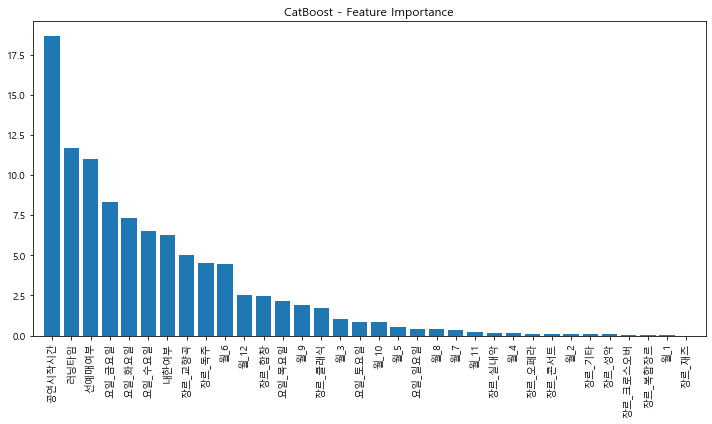

In [46]:
importances = cb.feature_importances_

# 변수 중요도를 내림차순으로 정렬
indices = importances.argsort()[::-1]

# 변수 이름 추출 (여기서 X_train은 학습 데이터의 독립 변수입니다.)
feature_names = train_X.columns

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("CatBoost - Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices], align="center")
plt.xticks(range(train_X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [47]:
explainer = shap.TreeExplainer(cb)
shap_values = explainer.shap_values(test_X)

In [48]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:])

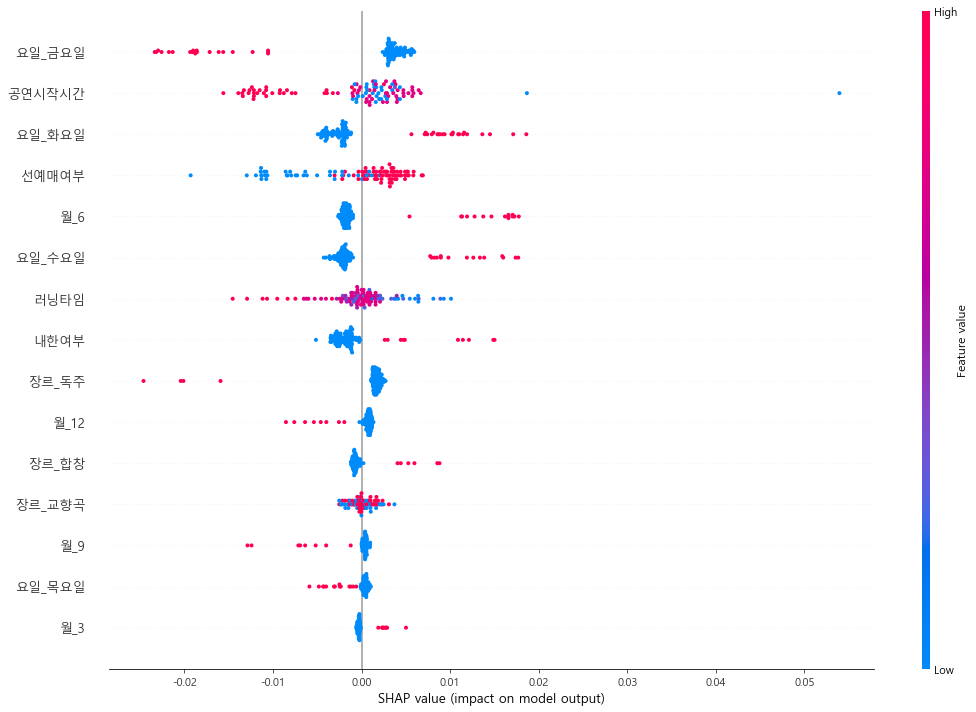

In [49]:
# summary
shap.summary_plot(shap_values, test_X, max_display=15, plot_size=(15,10))

In [50]:
test_X.columns.shape

(34,)

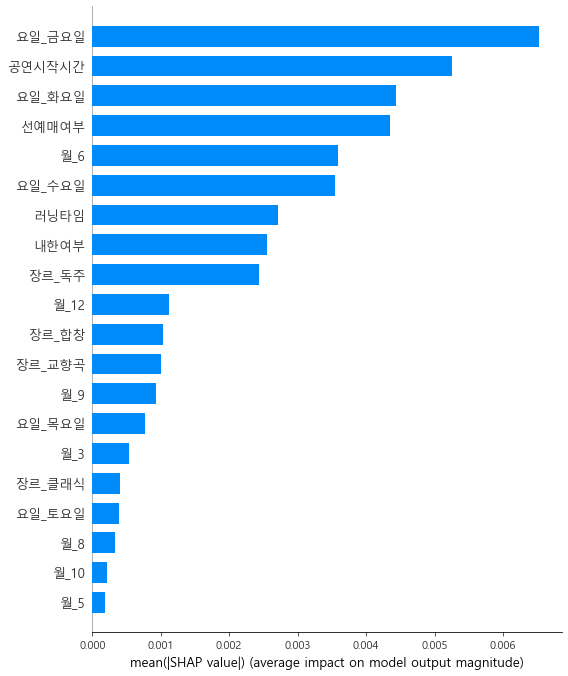

In [51]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_X, plot_type = "bar")

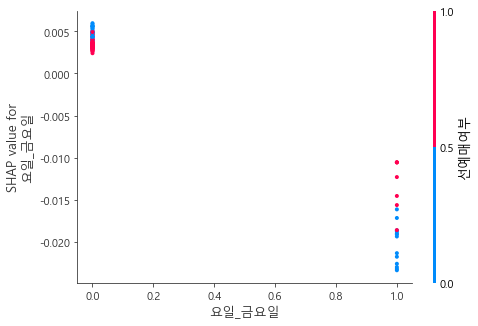

In [52]:
# 변수 간의 shap value 파악
shap.dependence_plot("요일_금요일", shap_values, test_X)

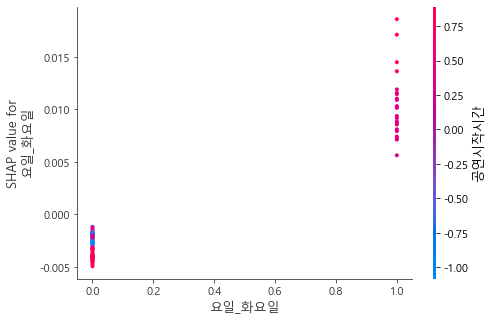

In [60]:
# 변수 간의 shap value 파악
shap.dependence_plot("요일_화요일", shap_values, test_X)

In [54]:
feature_names = train_X.columns

cb_resultX = pd.DataFrame(shap_values, columns = feature_names)

vals = np.abs(cb_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
16,요일_금요일,0.00653
0,공연시작시간,0.00526
21,요일_화요일,0.00444
2,선예매여부,0.00434
27,월_6,0.00359
18,요일_수요일,0.00355
1,러닝타임,0.00271
3,내한여부,0.00256
6,장르_독주,0.00244
33,월_12,0.00113


### 0.001 cutoff

In [55]:
x_list = shap_importance[shap_importance.feature_importance_vals>=0.001]['col_name'].tolist()

In [56]:
train_cut_X = train_X[x_list]
test_cut_X = test_X[x_list]

In [57]:
train_cut_X.shape

(412, 11)

In [58]:
# Define the CatBoost Regressor model
cb_cut = CatBoostRegressor(random_state=42)

# Define the hyperparameters to tune
param_grid = {'depth': [3, 5, 7, 10, 20],
              'learning_rate': [0.001, 0.01, 0.1, 0.3, 0.5]}

# Define the grid search using the model and hyperparameters
grid_search_cb_cut = GridSearchCV(cb_cut, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_cb_cut.fit(train_cut_X, train_y_res)

# Print the best parameters and the best score
print("Best parameters:", grid_search_cb_cut.best_params_)

0:	learn: 0.2534220	total: 661us	remaining: 661ms
1:	learn: 0.2533503	total: 1.5ms	remaining: 748ms
2:	learn: 0.2532806	total: 2.16ms	remaining: 718ms
3:	learn: 0.2531884	total: 2.87ms	remaining: 715ms
4:	learn: 0.2531343	total: 3.48ms	remaining: 693ms
5:	learn: 0.2530307	total: 4.08ms	remaining: 676ms
6:	learn: 0.2529266	total: 4.73ms	remaining: 671ms
7:	learn: 0.2528900	total: 5.37ms	remaining: 666ms
8:	learn: 0.2528152	total: 5.98ms	remaining: 659ms
9:	learn: 0.2527131	total: 6.62ms	remaining: 655ms
10:	learn: 0.2526142	total: 7.47ms	remaining: 672ms
11:	learn: 0.2525354	total: 8.18ms	remaining: 673ms
12:	learn: 0.2524493	total: 8.75ms	remaining: 665ms
13:	learn: 0.2523734	total: 9.65ms	remaining: 680ms
14:	learn: 0.2523016	total: 10.2ms	remaining: 673ms
15:	learn: 0.2522190	total: 11.1ms	remaining: 680ms
16:	learn: 0.2521259	total: 11.8ms	remaining: 681ms
17:	learn: 0.2520800	total: 12.4ms	remaining: 679ms
18:	learn: 0.2519948	total: 13.2ms	remaining: 680ms
19:	learn: 0.2519464	tot

163:	learn: 0.2439955	total: 123ms	remaining: 628ms
164:	learn: 0.2439363	total: 124ms	remaining: 628ms
165:	learn: 0.2438767	total: 125ms	remaining: 628ms
166:	learn: 0.2438436	total: 126ms	remaining: 628ms
167:	learn: 0.2438281	total: 127ms	remaining: 628ms
168:	learn: 0.2437819	total: 128ms	remaining: 628ms
169:	learn: 0.2437290	total: 128ms	remaining: 626ms
170:	learn: 0.2436913	total: 129ms	remaining: 626ms
171:	learn: 0.2436615	total: 130ms	remaining: 625ms
172:	learn: 0.2436165	total: 131ms	remaining: 625ms
173:	learn: 0.2435734	total: 132ms	remaining: 625ms
174:	learn: 0.2435335	total: 132ms	remaining: 624ms
175:	learn: 0.2434702	total: 133ms	remaining: 623ms
176:	learn: 0.2434296	total: 134ms	remaining: 622ms
177:	learn: 0.2434029	total: 135ms	remaining: 621ms
178:	learn: 0.2433582	total: 135ms	remaining: 620ms
179:	learn: 0.2433030	total: 136ms	remaining: 619ms
180:	learn: 0.2432750	total: 137ms	remaining: 618ms
181:	learn: 0.2432528	total: 138ms	remaining: 619ms
182:	learn: 

321:	learn: 0.2385071	total: 252ms	remaining: 532ms
322:	learn: 0.2384853	total: 253ms	remaining: 531ms
323:	learn: 0.2384441	total: 254ms	remaining: 530ms
324:	learn: 0.2383335	total: 255ms	remaining: 530ms
325:	learn: 0.2383103	total: 256ms	remaining: 529ms
326:	learn: 0.2382751	total: 257ms	remaining: 529ms
327:	learn: 0.2382561	total: 258ms	remaining: 528ms
328:	learn: 0.2382008	total: 259ms	remaining: 528ms
329:	learn: 0.2381653	total: 260ms	remaining: 527ms
330:	learn: 0.2381314	total: 260ms	remaining: 526ms
331:	learn: 0.2381120	total: 261ms	remaining: 525ms
332:	learn: 0.2380851	total: 262ms	remaining: 524ms
333:	learn: 0.2380620	total: 262ms	remaining: 523ms
334:	learn: 0.2380355	total: 263ms	remaining: 523ms
335:	learn: 0.2380124	total: 264ms	remaining: 523ms
336:	learn: 0.2379880	total: 266ms	remaining: 523ms
337:	learn: 0.2379709	total: 266ms	remaining: 522ms
338:	learn: 0.2379370	total: 267ms	remaining: 521ms
339:	learn: 0.2379031	total: 268ms	remaining: 521ms
340:	learn: 

634:	learn: 0.2305574	total: 509ms	remaining: 292ms
635:	learn: 0.2305495	total: 509ms	remaining: 292ms
636:	learn: 0.2305347	total: 510ms	remaining: 291ms
637:	learn: 0.2305294	total: 511ms	remaining: 290ms
638:	learn: 0.2305201	total: 511ms	remaining: 289ms
639:	learn: 0.2305032	total: 512ms	remaining: 288ms
640:	learn: 0.2304852	total: 513ms	remaining: 287ms
641:	learn: 0.2304389	total: 514ms	remaining: 287ms
642:	learn: 0.2304299	total: 515ms	remaining: 286ms
643:	learn: 0.2304152	total: 516ms	remaining: 285ms
644:	learn: 0.2304056	total: 517ms	remaining: 284ms
645:	learn: 0.2303934	total: 517ms	remaining: 283ms
646:	learn: 0.2303722	total: 518ms	remaining: 283ms
647:	learn: 0.2303570	total: 519ms	remaining: 282ms
648:	learn: 0.2303419	total: 519ms	remaining: 281ms
649:	learn: 0.2303299	total: 520ms	remaining: 280ms
650:	learn: 0.2303069	total: 521ms	remaining: 279ms
651:	learn: 0.2302913	total: 521ms	remaining: 278ms
652:	learn: 0.2302849	total: 522ms	remaining: 278ms
653:	learn: 

798:	learn: 0.2268837	total: 636ms	remaining: 160ms
799:	learn: 0.2268105	total: 637ms	remaining: 159ms
800:	learn: 0.2267888	total: 638ms	remaining: 158ms
801:	learn: 0.2267823	total: 639ms	remaining: 158ms
802:	learn: 0.2267727	total: 640ms	remaining: 157ms
803:	learn: 0.2267006	total: 640ms	remaining: 156ms
804:	learn: 0.2266790	total: 641ms	remaining: 155ms
805:	learn: 0.2266688	total: 642ms	remaining: 155ms
806:	learn: 0.2266474	total: 643ms	remaining: 154ms
807:	learn: 0.2266209	total: 644ms	remaining: 153ms
808:	learn: 0.2265995	total: 645ms	remaining: 152ms
809:	learn: 0.2265933	total: 646ms	remaining: 151ms
810:	learn: 0.2265851	total: 646ms	remaining: 151ms
811:	learn: 0.2265796	total: 647ms	remaining: 150ms
812:	learn: 0.2265658	total: 648ms	remaining: 149ms
813:	learn: 0.2265498	total: 649ms	remaining: 148ms
814:	learn: 0.2265062	total: 650ms	remaining: 148ms
815:	learn: 0.2264999	total: 652ms	remaining: 147ms
816:	learn: 0.2264951	total: 652ms	remaining: 146ms
817:	learn: 

958:	learn: 0.2241374	total: 764ms	remaining: 32.7ms
959:	learn: 0.2241240	total: 765ms	remaining: 31.9ms
960:	learn: 0.2241213	total: 766ms	remaining: 31.1ms
961:	learn: 0.2241197	total: 766ms	remaining: 30.3ms
962:	learn: 0.2241064	total: 767ms	remaining: 29.5ms
963:	learn: 0.2240979	total: 768ms	remaining: 28.7ms
964:	learn: 0.2240955	total: 769ms	remaining: 27.9ms
965:	learn: 0.2240877	total: 770ms	remaining: 27.1ms
966:	learn: 0.2240794	total: 770ms	remaining: 26.3ms
967:	learn: 0.2240766	total: 771ms	remaining: 25.5ms
968:	learn: 0.2240741	total: 772ms	remaining: 24.7ms
969:	learn: 0.2240662	total: 773ms	remaining: 23.9ms
970:	learn: 0.2240531	total: 773ms	remaining: 23.1ms
971:	learn: 0.2240355	total: 774ms	remaining: 22.3ms
972:	learn: 0.2240195	total: 775ms	remaining: 21.5ms
973:	learn: 0.2239984	total: 776ms	remaining: 20.7ms
974:	learn: 0.2239851	total: 776ms	remaining: 19.9ms
975:	learn: 0.2239792	total: 777ms	remaining: 19.1ms
976:	learn: 0.2239733	total: 778ms	remaining: 

In [59]:
cb_cut = CatBoostRegressor(depth=3, learning_rate=0.01, random_state=42)
cb_cut.fit(train_cut_X, train_y_res)

print(f"MSE for CatBoost Cut : {mean_squared_error(test_y_res, cb_cut.predict(test_cut_X))}")
print(f"MSLE for CatBoost Cut : {mean_squared_log_error(test_y_res, cb_cut.predict(test_cut_X))}")

0:	learn: 0.2534220	total: 703us	remaining: 703ms
1:	learn: 0.2533503	total: 1.76ms	remaining: 879ms
2:	learn: 0.2532806	total: 2.62ms	remaining: 872ms
3:	learn: 0.2531884	total: 3.48ms	remaining: 866ms
4:	learn: 0.2531343	total: 4.55ms	remaining: 906ms
5:	learn: 0.2530307	total: 5.49ms	remaining: 910ms
6:	learn: 0.2529266	total: 6.46ms	remaining: 917ms
7:	learn: 0.2528900	total: 7.35ms	remaining: 911ms
8:	learn: 0.2528152	total: 8.27ms	remaining: 911ms
9:	learn: 0.2527131	total: 9.13ms	remaining: 904ms
10:	learn: 0.2526142	total: 9.98ms	remaining: 897ms
11:	learn: 0.2525354	total: 10.8ms	remaining: 885ms
12:	learn: 0.2524493	total: 11.5ms	remaining: 872ms
13:	learn: 0.2523734	total: 12.3ms	remaining: 863ms
14:	learn: 0.2523016	total: 13.4ms	remaining: 881ms
15:	learn: 0.2522190	total: 14.1ms	remaining: 865ms
16:	learn: 0.2521259	total: 15ms	remaining: 865ms
17:	learn: 0.2520800	total: 15.7ms	remaining: 859ms
18:	learn: 0.2519948	total: 16.5ms	remaining: 850ms
19:	learn: 0.2519464	tota

166:	learn: 0.2438436	total: 132ms	remaining: 658ms
167:	learn: 0.2438281	total: 133ms	remaining: 657ms
168:	learn: 0.2437819	total: 133ms	remaining: 656ms
169:	learn: 0.2437290	total: 134ms	remaining: 655ms
170:	learn: 0.2436913	total: 135ms	remaining: 654ms
171:	learn: 0.2436615	total: 136ms	remaining: 654ms
172:	learn: 0.2436165	total: 137ms	remaining: 653ms
173:	learn: 0.2435734	total: 137ms	remaining: 652ms
174:	learn: 0.2435335	total: 138ms	remaining: 652ms
175:	learn: 0.2434702	total: 139ms	remaining: 651ms
176:	learn: 0.2434296	total: 140ms	remaining: 650ms
177:	learn: 0.2434029	total: 141ms	remaining: 650ms
178:	learn: 0.2433582	total: 142ms	remaining: 649ms
179:	learn: 0.2433030	total: 142ms	remaining: 649ms
180:	learn: 0.2432750	total: 143ms	remaining: 648ms
181:	learn: 0.2432528	total: 144ms	remaining: 647ms
182:	learn: 0.2432110	total: 145ms	remaining: 647ms
183:	learn: 0.2431929	total: 146ms	remaining: 646ms
184:	learn: 0.2431665	total: 146ms	remaining: 645ms
185:	learn: 

324:	learn: 0.2383335	total: 262ms	remaining: 545ms
325:	learn: 0.2383103	total: 263ms	remaining: 544ms
326:	learn: 0.2382751	total: 264ms	remaining: 543ms
327:	learn: 0.2382561	total: 265ms	remaining: 543ms
328:	learn: 0.2382008	total: 266ms	remaining: 543ms
329:	learn: 0.2381653	total: 267ms	remaining: 542ms
330:	learn: 0.2381314	total: 268ms	remaining: 541ms
331:	learn: 0.2381120	total: 268ms	remaining: 540ms
332:	learn: 0.2380851	total: 269ms	remaining: 539ms
333:	learn: 0.2380620	total: 270ms	remaining: 538ms
334:	learn: 0.2380355	total: 271ms	remaining: 537ms
335:	learn: 0.2380124	total: 271ms	remaining: 536ms
336:	learn: 0.2379880	total: 272ms	remaining: 535ms
337:	learn: 0.2379709	total: 273ms	remaining: 534ms
338:	learn: 0.2379370	total: 274ms	remaining: 534ms
339:	learn: 0.2379031	total: 274ms	remaining: 533ms
340:	learn: 0.2378832	total: 275ms	remaining: 532ms
341:	learn: 0.2378693	total: 276ms	remaining: 531ms
342:	learn: 0.2378371	total: 277ms	remaining: 530ms
343:	learn: 

493:	learn: 0.2340019	total: 393ms	remaining: 402ms
494:	learn: 0.2339740	total: 394ms	remaining: 402ms
495:	learn: 0.2339540	total: 394ms	remaining: 401ms
496:	learn: 0.2339162	total: 395ms	remaining: 400ms
497:	learn: 0.2338357	total: 396ms	remaining: 399ms
498:	learn: 0.2338116	total: 397ms	remaining: 398ms
499:	learn: 0.2337999	total: 397ms	remaining: 397ms
500:	learn: 0.2337440	total: 398ms	remaining: 396ms
501:	learn: 0.2337300	total: 399ms	remaining: 395ms
502:	learn: 0.2337096	total: 399ms	remaining: 395ms
503:	learn: 0.2336809	total: 400ms	remaining: 394ms
504:	learn: 0.2336645	total: 401ms	remaining: 393ms
505:	learn: 0.2336524	total: 402ms	remaining: 392ms
506:	learn: 0.2336296	total: 402ms	remaining: 391ms
507:	learn: 0.2335326	total: 403ms	remaining: 390ms
508:	learn: 0.2335187	total: 404ms	remaining: 389ms
509:	learn: 0.2335031	total: 404ms	remaining: 388ms
510:	learn: 0.2334855	total: 405ms	remaining: 387ms
511:	learn: 0.2334758	total: 406ms	remaining: 386ms
512:	learn: 

654:	learn: 0.2302048	total: 522ms	remaining: 275ms
655:	learn: 0.2301897	total: 522ms	remaining: 274ms
656:	learn: 0.2301735	total: 523ms	remaining: 273ms
657:	learn: 0.2301133	total: 524ms	remaining: 272ms
658:	learn: 0.2300772	total: 525ms	remaining: 272ms
659:	learn: 0.2300438	total: 526ms	remaining: 271ms
660:	learn: 0.2300111	total: 526ms	remaining: 270ms
661:	learn: 0.2299947	total: 527ms	remaining: 269ms
662:	learn: 0.2299661	total: 528ms	remaining: 268ms
663:	learn: 0.2299457	total: 529ms	remaining: 267ms
664:	learn: 0.2299141	total: 529ms	remaining: 267ms
665:	learn: 0.2298707	total: 530ms	remaining: 266ms
666:	learn: 0.2298609	total: 531ms	remaining: 265ms
667:	learn: 0.2298245	total: 532ms	remaining: 264ms
668:	learn: 0.2297992	total: 532ms	remaining: 263ms
669:	learn: 0.2297753	total: 533ms	remaining: 263ms
670:	learn: 0.2297475	total: 534ms	remaining: 262ms
671:	learn: 0.2297218	total: 535ms	remaining: 261ms
672:	learn: 0.2297056	total: 536ms	remaining: 260ms
673:	learn: 

821:	learn: 0.2263807	total: 651ms	remaining: 141ms
822:	learn: 0.2263387	total: 652ms	remaining: 140ms
823:	learn: 0.2262974	total: 653ms	remaining: 139ms
824:	learn: 0.2262789	total: 654ms	remaining: 139ms
825:	learn: 0.2262577	total: 654ms	remaining: 138ms
826:	learn: 0.2262466	total: 655ms	remaining: 137ms
827:	learn: 0.2262301	total: 656ms	remaining: 136ms
828:	learn: 0.2262148	total: 657ms	remaining: 135ms
829:	learn: 0.2261741	total: 658ms	remaining: 135ms
830:	learn: 0.2261636	total: 658ms	remaining: 134ms
831:	learn: 0.2260936	total: 659ms	remaining: 133ms
832:	learn: 0.2260617	total: 660ms	remaining: 132ms
833:	learn: 0.2260308	total: 661ms	remaining: 131ms
834:	learn: 0.2260182	total: 662ms	remaining: 131ms
835:	learn: 0.2260148	total: 663ms	remaining: 130ms
836:	learn: 0.2260038	total: 664ms	remaining: 129ms
837:	learn: 0.2259349	total: 665ms	remaining: 128ms
838:	learn: 0.2259319	total: 666ms	remaining: 128ms
839:	learn: 0.2259290	total: 666ms	remaining: 127ms
840:	learn: 

985:	learn: 0.2238257	total: 777ms	remaining: 11ms
986:	learn: 0.2238027	total: 778ms	remaining: 10.2ms
987:	learn: 0.2237862	total: 779ms	remaining: 9.46ms
988:	learn: 0.2237839	total: 780ms	remaining: 8.67ms
989:	learn: 0.2237793	total: 780ms	remaining: 7.88ms
990:	learn: 0.2237592	total: 781ms	remaining: 7.09ms
991:	learn: 0.2237312	total: 782ms	remaining: 6.31ms
992:	learn: 0.2237287	total: 783ms	remaining: 5.52ms
993:	learn: 0.2237143	total: 784ms	remaining: 4.73ms
994:	learn: 0.2237057	total: 784ms	remaining: 3.94ms
995:	learn: 0.2236805	total: 785ms	remaining: 3.15ms
996:	learn: 0.2236173	total: 786ms	remaining: 2.36ms
997:	learn: 0.2236003	total: 787ms	remaining: 1.58ms
998:	learn: 0.2235680	total: 788ms	remaining: 788us
999:	learn: 0.2235521	total: 788ms	remaining: 0us
MSE for CatBoost Cut : 0.07646287489832858
MSLE for CatBoost Cut : 0.033832722286734326
